In [1]:
from random_example import Random_spectroscopy
from pyquac.fmn_plottools import Heatmap, Dash_app
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## core functions


In [2]:
# Create new instance of spectroscopy class
y_arr = np.linspace(4e9, 5e9, 401)
x_arr = np.linspace(-1, 1, 101)

data = Random_spectroscopy(x_arr=x_arr, y_arr=y_arr)


In [3]:
# create a figure with specific properties and connect it to our app
figure = Heatmap.plot_figure(
    data.get_result(), logo=True, sub_title="some info", cmap="rdylbu"
)

In [5]:
# app configure.
# uncheck the stop live update to see the heatmap filling in real time
app = Dash_app(data, figure, qubit_id=1, chip_id=2)
app.configure_app(mode="inline", port=2022, interval=1000)


### Running measurements


In [6]:
# measuring of specific x or y values
# data.run_measurements(x_key=[-0.5, 0, .5], sleep=1e-3)

# measuring the range of values within the X and Y coordinates
data.run_measurements(x_min=0.1, y_min=4.2e9, sleep=1e-3)

# measuring all data
# data.run_measurements()


### Deleting measurements


In [7]:
# Deleting the range of values within the X and Y coordinates
data.drop(x_min=-0.5, y_min=4.4e9, y_max=4.6e9)

# Deleting specific X or Y axis data
# data.drop(x=-0.9)

# Deleting all data
# data.cls()


### Get result dataframe


In [8]:
# Base dataframe
# you can set imshow = True for matplotlib plot
# plt.pcolormesh(data.get_result(imshow=True))
data.get_result()


,x_value,y_value,z_value
0,-1.0,4.000000e+09,NaN
1,-1.0,4.002500e+09,NaN
2,-1.0,4.005000e+09,NaN
3,-1.0,4.007500e+09,NaN
4,-1.0,4.010000e+09,NaN
...,...,...,...
40496,1.0,4.990000e+09,0.335524
40497,1.0,4.992500e+09,0.753020
40498,1.0,4.995000e+09,0.648292
40499,1.0,4.997500e+09,0.791518


### Peak detection


In [9]:
# Load example file
file = pd.read_csv("example_data.csv")
file


,currents,frequencies,response
0,-3.0,6.275000e+09,-61.128872
1,-3.0,6.275025e+09,-61.489191
2,-3.0,6.275050e+09,-61.044796
3,-3.0,6.275075e+09,-61.181111
4,-3.0,6.275100e+09,-61.166323
...,...,...,...
40496,3.0,6.284900e+09,-58.811853
40497,3.0,6.284925e+09,-58.616121
40498,3.0,6.284950e+09,-58.733909
40499,3.0,6.284975e+09,-58.747148


In [10]:
# create new instance
data_example = Random_spectroscopy(
    x_min=file.currents.min(),
    x_max=file.currents.max(),
    x_step=0.06,
    y_min=file.frequencies.min(),
    y_max=file.frequencies.max(),
    y_step=file.frequencies[1] - file.frequencies[0],
)

# load data to instance
data_example.load_data(
    "example_data.csv",
    x_col_name="currents",
    y_col_name="frequencies",
    z_col_name="response",
)


In [11]:
# create some figure
figure = Heatmap.plot_figure(
    data_example.get_result(),
    logo=True,
    sub_title="this is an example data",
    cmap="rdylbu",
    title="Single Tone Spectroscopy",
)


In [12]:
# create app
# uncheck the stop live update to see the heatmap filling in real time
app = Dash_app(data_example, figure, qubit_id=1, chip_id=2)
app.configure_app(mode="inline", port=4041, interval=1000)


In [13]:
# Lets check how peak detection is working
peak_line = data_example.xyz_peak(thres=0.7, min_dist=75, n_last=20)


In [14]:
# Lets delete most data to check how approximation works
cols_to_del = data_example.x_list[
    np.isin(data_example.x_list, [-2.4, 0, 2.4], invert=True)
]
data_example.drop(x=cols_to_del)

# data approximation
print("the fit of the curve is made at the following points")
line = data_example.approximate(
    poly_nop=1000,
    resolving_zone=0.1,
    x_key=None,
    thres=0.7,
    min_dist=75,
    n_last=20,
    deg=2,
    fillna=False,
)["poly_line"]


the fit of the curve is made at the following points
x [-2.4  0.   2.4]
y [6.280275e+09 6.280425e+09 6.280150e+09]


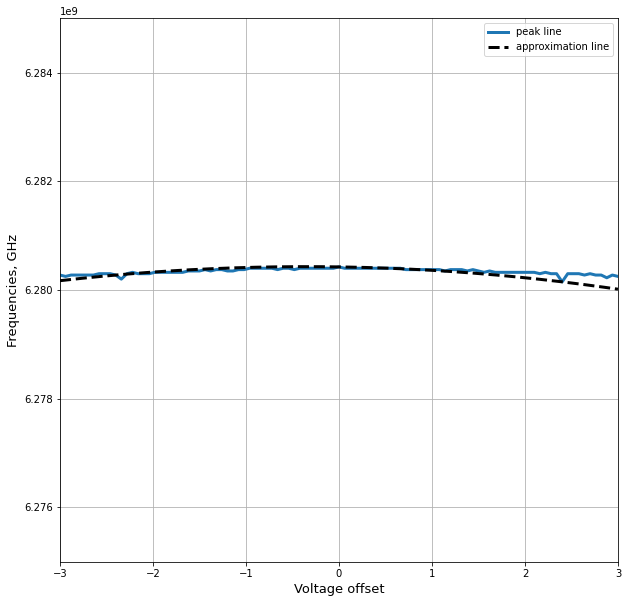

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(peak_line[0], peak_line[1], linewidth=3, label="peak line")
plt.plot(
    line["x"],
    line["y"],
    linewidth=3,
    color="black",
    linestyle="--",
    label="approximation line",
)
plt.ylim([data_example.y_min, data_example.y_max])
plt.xlim([data_example.x_min, data_example.x_max])
plt.xlabel("Voltage offset", size=13)
plt.ylabel("Frequencies, GHz", size=13)
plt.legend()
plt.grid()
